In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
Y = pd.read_csv('yTrain.csv').head(10000)

In [2]:
# KNN Tuning
def KNN_tune(X, Y, dataset, k_range, distance_metrics):
    knn_params = {'n_neighbors': k_range,
                  'metric': distance_metrics}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, knn_params, cv=10, scoring='f1')
    grid_search.fit(X, Y)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"The best parameters for {dataset} dataset are: {best_params} with {best_score} f1-score.")
    cv_results = grid_search.cv_results_
    mean_test_scores = cv_results['mean_test_score']
    params = cv_results['params']   
    results_df = pd.DataFrame(params)
    results_df['mean_test_score'] = mean_test_scores
    plt.figure(figsize=(12, 6))
    for metric in distance_metrics:
        subset = results_df[results_df['metric'] == metric]
        plt.plot(subset['n_neighbors'], subset['mean_test_score'], label=metric)
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Average F1-Score')
    plt.title(f'KNN on {dataset} Dataset for K with Different Distance Metrics')
    plt.legend()
    plt.show()

# Perceptron Tuning
def PERC_tune(X, Y, dataset, eta0, max_iter, penalty, tol):
    perc_params = {
        'eta0': eta0,  # Learning rate
        'max_iter': max_iter,  # Maximum iterations
        'penalty': penalty,  # Penalty
        'tol': tol  # Tolerance
    }
    perceptron = Perceptron()
    grid_search = GridSearchCV(perceptron, perc_params, cv=10, scoring='f1')
    grid_search.fit(X, Y)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"The best parameters for {dataset} dataset are: {best_params} with {best_score} f1-score.")
    cv_results = grid_search.cv_results_
    results_df = pd.DataFrame(cv_results['params'])
    results_df['mean_test_score'] = cv_results['mean_test_score']
    results_df.replace({None: 'None'}, inplace=True)
    parameters = ['eta0', 'max_iter', 'penalty', 'tol']
    plt.figure(figsize=(20, 5))
    for i, param in enumerate(parameters):
        plt.subplot(1, 4, i + 1)
        unique_values = perc_params[param]
        if None in unique_values: unique_values = [v if v is not None else 'None' for v in unique_values]
        for value in unique_values:
            subset = results_df[results_df[param] == value]
            plt.plot(range(subset.shape[0]), subset['mean_test_score'], marker='o', label=str(value))
        plt.title(param)
        plt.xlabel('Parameter index')
        plt.ylabel('Mean F1-Score')
        plt.legend()
    plt.tight_layout()
    plt.show()

def LR_tune(X, Y, dataset, max_iters):
    mi_scores = []
    best_mi = 0
    highest = 0
    for mi in max_iters:
        lr = LogisticRegression(max_iter=mi, random_state=42)
        scores = cross_val_score(lr, X, Y, cv=10, scoring='f1')
        mi_score = scores.mean()
        if mi_score > highest:
            highest = mi_score
            best_mi = mi
        mi_scores.append(mi_score)
    print(f'The best solver for {dataset} dataset is: {best_mi} with {highest} f1-score.')
    plt.figure(figsize=(10, 6))
    plt.plot(max_iters, mi_scores)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Average F1-score')
    plt.title(f'Logistic Regression 10-Fold Cross-Validation on {dataset} Dataset for Max Iterations')
    plt.show()


The best parameters for Binary dataset are: {'eta0': 0.01, 'max_iter': 10, 'penalty': None, 'tol': 0.01} with 0.932176876319121 f1-score.


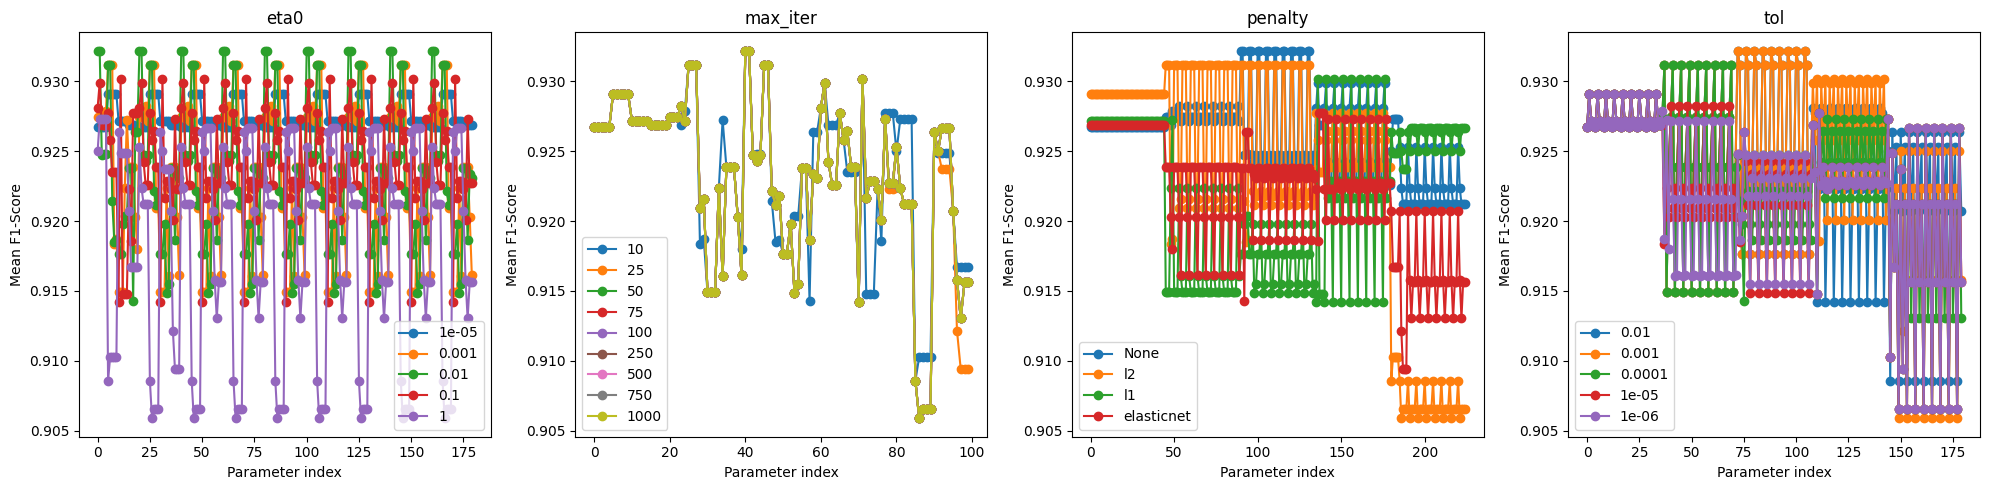

In [3]:
# Binary Dataset
x_binary = pd.read_csv('binary_df_train.csv').head(10000)

PERC_tune(x_binary, Y, 'Binary', [0.00001, 0.001, 0.01, 0.1, 1], [10, 20, 30, 40, 50], [None, 'l2', 'l1', 'elasticnet'], [1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
#LR_tune(x_binary, Y, 'Binary', [i for i in range(1, 51)])

The best parameters for Bow dataset are: {'eta0': 1, 'max_iter': 10, 'penalty': None, 'tol': 0.001} with 0.9309224596548253 f1-score.


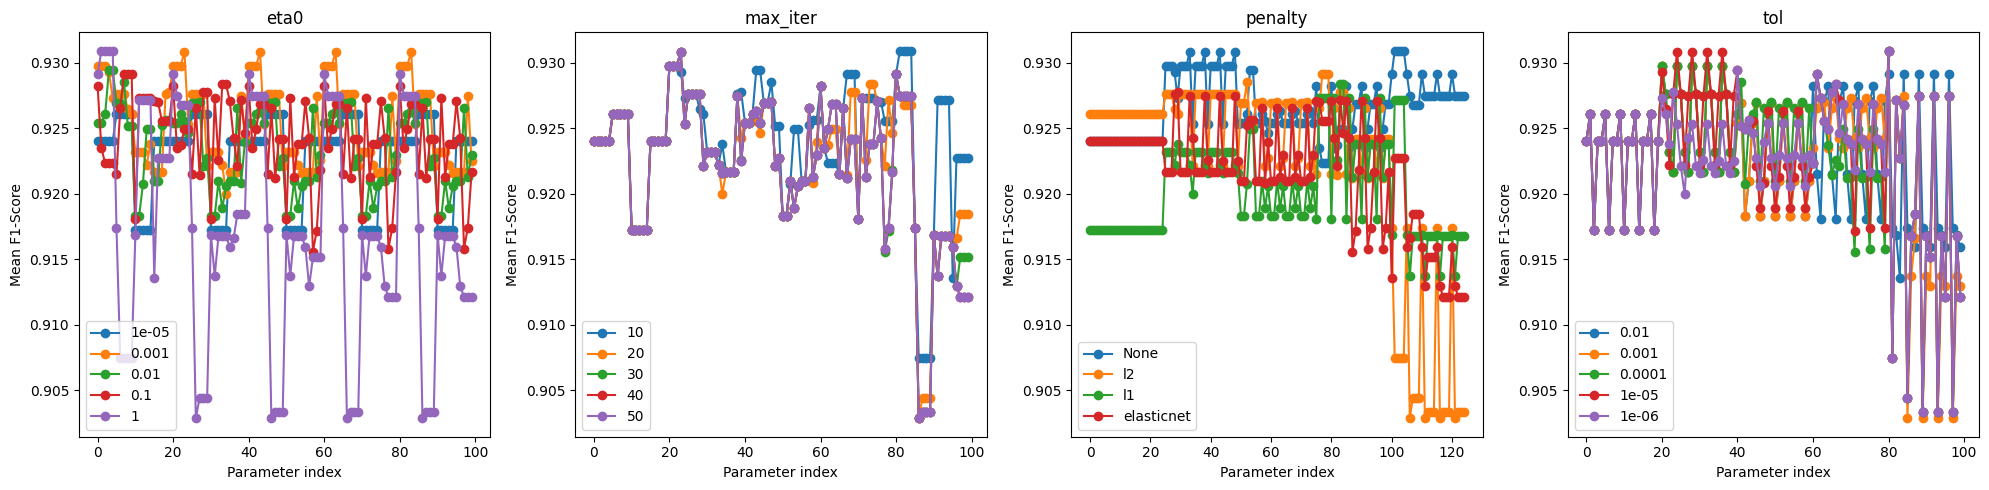

In [3]:
# Bag of Words Dataset
x_bow = pd.read_csv('bow_df_train.csv').head(10000)

PERC_tune(x_bow, Y, 'Bow', [0.00001, 0.001, 0.01, 0.1, 1], [10, 20, 30, 40, 50], [None, 'l2', 'l1', 'elasticnet'], [1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
#LR_tune(x_bow, Y, 'Bow', [i for i in range(1, 51)])

The best parameters for Tfidf dataset are: {'eta0': 1e-05, 'max_iter': 10, 'penalty': None, 'tol': 0.01} with 0.9309949148716159 f1-score.


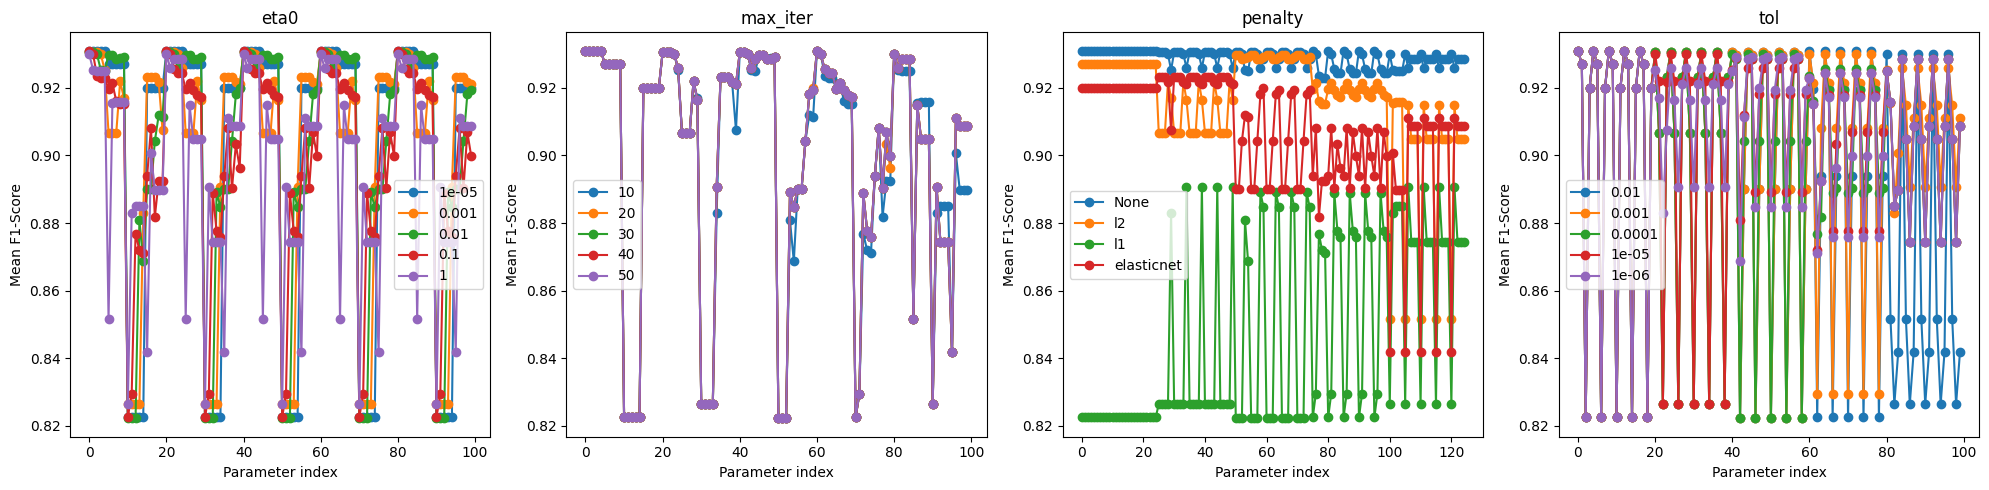

In [3]:
# Tfidf Dataset
x_tfidf = pd.read_csv('tfidf_df_train.csv').head(10000)

PERC_tune(x_tfidf, Y, 'Tfidf', [0.00001, 0.001, 0.01, 0.1, 1], [10, 20, 30, 40, 50], [None, 'l2', 'l1', 'elasticnet'], [1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
#LR_tune(x_tfidf, Y, 'Tfidf', [i for i in range(1, 51)])

The best parameters for Hashing dataset are: {'eta0': 0.01, 'max_iter': 20, 'penalty': 'l2', 'tol': 1e-06} with 0.86789008998879 f1-score.


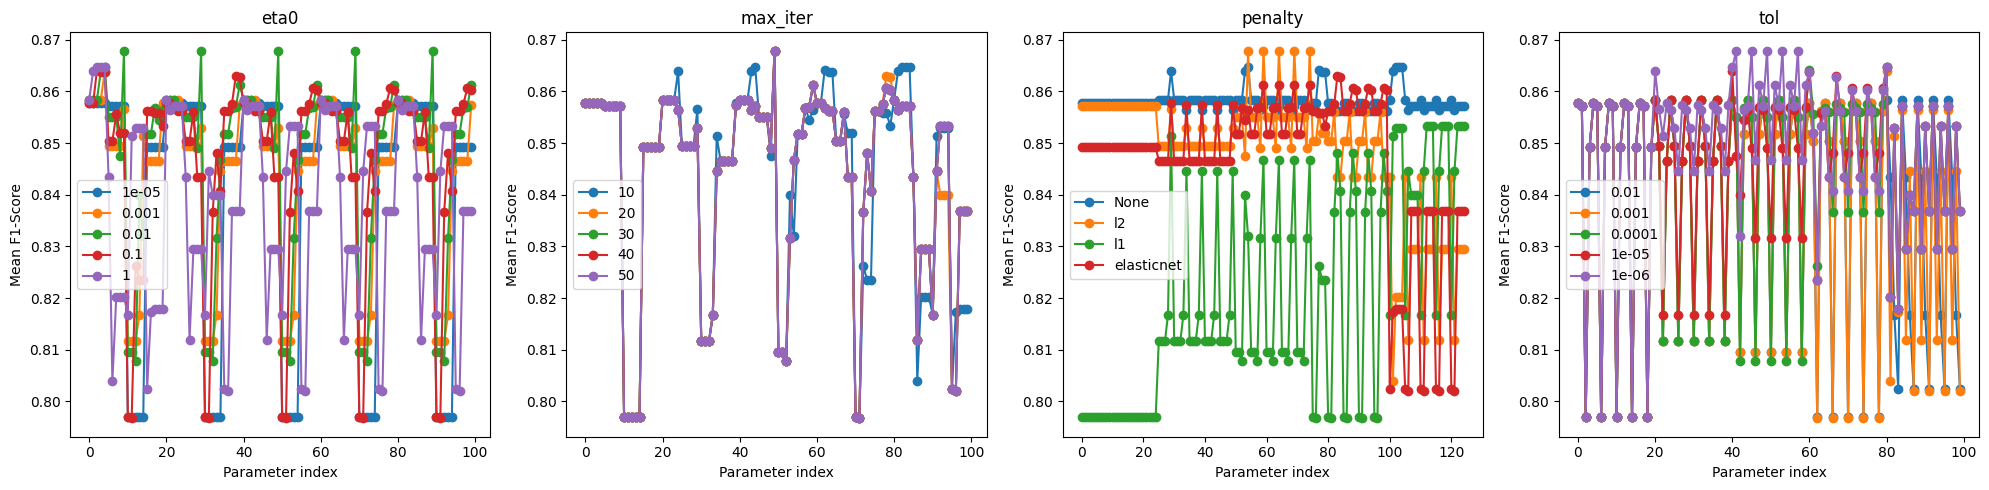

In [3]:
# Hash Dataset
x_hash = pd.read_csv('hash_df_train.csv').head(10000)

PERC_tune(x_hash, Y, 'Hashing', [0.00001, 0.001, 0.01, 0.1, 1], [10, 20, 30, 40, 50], [None, 'l2', 'l1', 'elasticnet'], [1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
#LR_tune(x_hash, Y, 'Hashing', [i for i in range(1, 51)])

The best parameters for LDA dataset are: {'eta0': 0.01, 'max_iter': 10, 'penalty': 'l2', 'tol': 0.01} with 0.8452644898635764 f1-score.


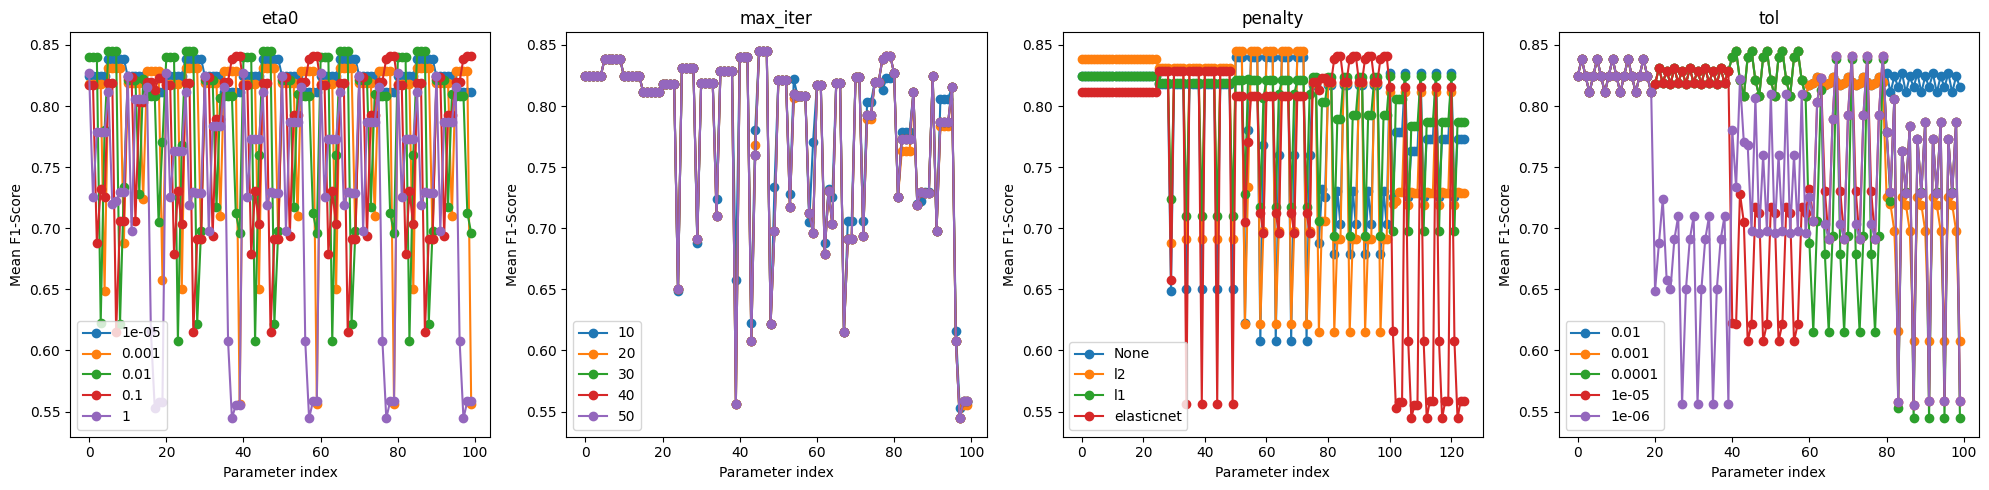

In [4]:
# LDA Dataset
x_lda = pd.read_csv('lda_df_train.csv').head(10000)

#KNN_tune(x_lda, Y, 'LDA', [k for k in range(1, 51)], ['euclidean', 'manhattan', 'chebyshev'])
PERC_tune(x_lda, Y, 'LDA', [0.00001, 0.001, 0.01, 0.1, 1], [10, 20, 30, 40, 50], [None, 'l2', 'l1', 'elasticnet'], [1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
#LR_tune(x_lda, Y, 'LDA', [i for i in range(1, 101)])

The best parameters for PCA dataset are: {'eta0': 1, 'max_iter': 10, 'penalty': 'elasticnet', 'tol': 0.01} with 0.8628936560653647 f1-score.


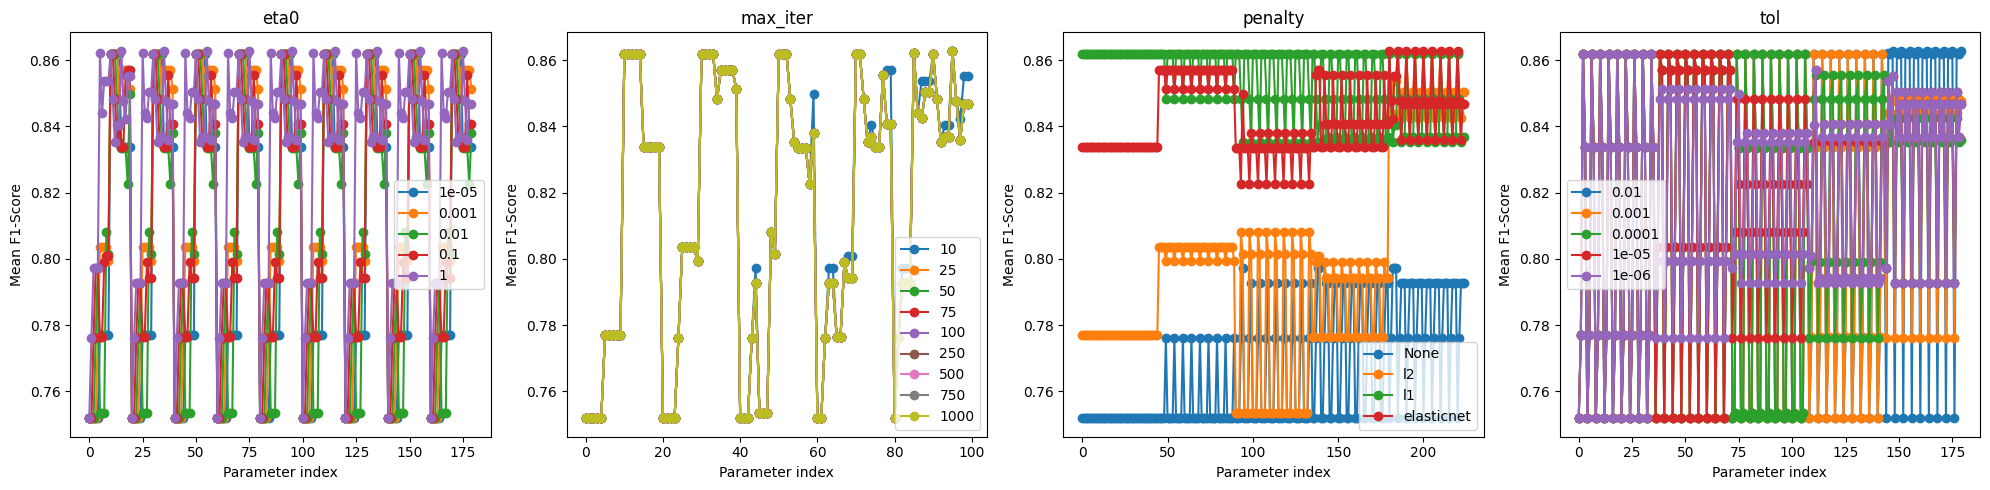

In [10]:
# PCA Dataset
x_pca = pd.read_csv('pca_df_train.csv').head(10000)

#KNN_tune(x_pca, Y, 'PCA', [k for k in range(1, 51)], ['euclidean', 'manhattan', 'chebyshev'])
PERC_tune(x_pca, Y, 'PCA', [0.00001, 0.001, 0.01, 0.1, 1], [10, 20, 30, 40, 50], [None, 'l2', 'l1', 'elasticnet'], [1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
#LR_tune(x_pca, Y, 'PCA', [i for i in range(1, 50)])